## One lesson just for this?!

This might be a very small point in some data science classes, so why in this highly abbreviated course are we spending a whole lesson on it! 

Well honestly it's because this is the most important part of machine learning. So many people forget to use a test set or peek at their data. This can ruin years effort spent in data collection or previous research. So with no further ado, let's dive into the assumptions again and see what has changed:

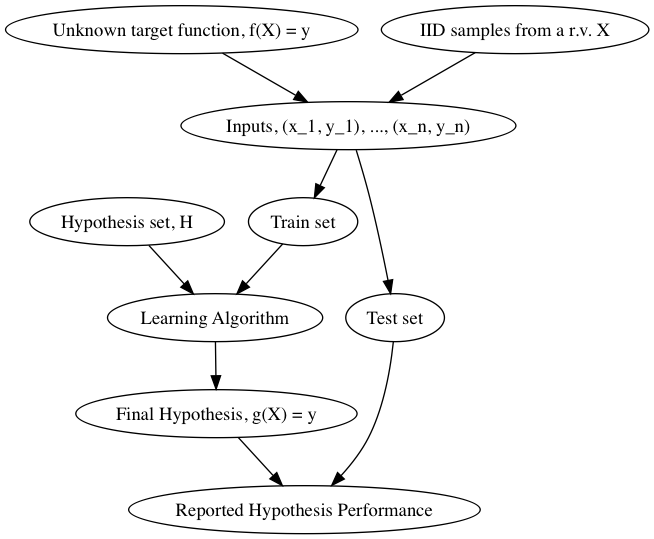

In [3]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'
c6 = 'Train set'
c7 = 'Test set'
c8 = 'Reported Hypothesis Performance'

G = nx.DiGraph()
G.add_node(c0)
G.add_node(c1)
G.add_edge(c0, c1)
G.add_node(c2)
G.add_node(c3)
G.add_edge(c3, c2)
G.add_node(c4)
G.add_edge(c2, c4)
G.add_node(c5)
G.add_edge(c5, c1)
G.add_node(c6)
G.add_node(c7)
G.add_edge(c1, c6)
G.add_edge(c1, c7)
G.add_edge(c6, c2)
G.add_edge(c7, c8)
G.add_edge(c4, c8)


draw(G)

Getting pretty complex huh? Well we are almost there in terms of completing this diagram, so don't be scared.

So notice that we split our input data into two sets:

* Train set, we use this to pick to final hypothesis. We look through every hypothesis in our hypothesis set using the training data to (sometimes guide our search and to) score our hypotheses. Then we return the hypothesis with the best score. But as we showed in the previous lesson our bounds for the accuracy of the hypothesis might be quite loose. While we can say that we have learned something, we don't know how well we have learned it. 
* Test set, just as we have tests in school to test our knowledge, we need to have a test for the learning algorithm. We split the test set at the start and we don't look at it until we are ready with our final hypothesis. We try as best we can not to look at the data at all before we split the data, because if we do look at the data beforehand, our test set could be invalidated. The intuitive reason is the same as allowing students a sneak peak at the final exam. The real reason is that by you looking at the data, you'll change your hypothesis set. Which in effect acts like training. 

## Example

So just to show you what a real learning problem looks like, let's do an example down below:

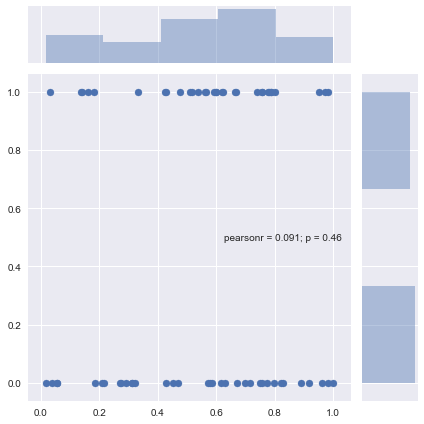

In [10]:
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# this is the data sample that we are given
y = np.random.randint(0, 2, size=100)
X = np.random.rand(100)

# now before we even look at the data, we split it into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# now we can look at the training data (do anything we want with it!)
sns.jointplot(X_train, y_train)

Remember this is random data, so you should not see too much of a pattern to it. Next we come up with our hypothesis set, which I will do below:

In [11]:
hypothesis_set = []

# this is a series of thresholds, from 0 to 1
for i in range(11):
    hypothesis_set.append(lambda x: x > i / 10.)
    

Now we score each hypothesis:

In [17]:
from sklearn.metrics import accuracy_score

scores = []
for i, h in enumerate(hypothesis_set):
    preds = map(h, X_train)
    score = accuracy_score(y_train, preds)
    print i, score
    
    scores.append(score)
    
best_hypo = np.argmax(scores)
print best_hypo

0 0.477611940299
1 0.522388059701
2 0.477611940299
3 0.55223880597
4 0.582089552239
5 0.582089552239
6 0.507462686567
7 0.507462686567
8 0.477611940299
9 0.507462686567
10 0.522388059701
4


We find the best hypothesis, and then we forget the score it got during training. Next step is to test this hypothesis and see how well it does on the test set:

In [18]:
preds = map(hypothesis_set[best_hypo], X_test)
accuracy_score(y_test, preds)

0.60606060606060608

We can even, as we have done before, bootstrap to estimate a confidence interval for the accuracy:

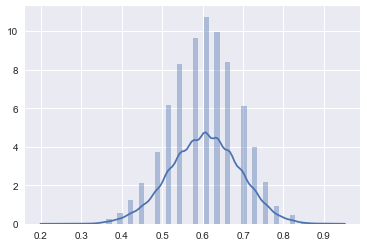

In [21]:
from sklearn.utils import resample

def bootstrap_acc():
    X_test_sample, y_test_sample = resample(X_test, y_test)
    
    preds = map(hypothesis_set[best_hypo], X_test_sample)
    return accuracy_score(y_test_sample, preds)

bootstrap_acc_scores = [bootstrap_acc() for _ in range(10000)]

sns.distplot(bootstrap_acc_scores)

## Recap and what's next

Hopefully this lesson has given you much more insight into what actually happens when you do a supervised machine learning problem. We have finally enough information to take the theory we have learned and put it to the test. 

There should now be a couple more questions that I should ask you:

* What would happen if I increase the size of the hypothesis set?
* What would happen if I increase the number of samples I initially got?
* What would happen if I shift more examples from the train to the test set?

Next time we will dive again into an example and begin exploring some other extremely important topics related to supervised learning